In [1]:
from datetime import datetime
import pandas as pd

In [2]:
now=datetime.now()
now

datetime.datetime(2023, 7, 20, 21, 0, 12, 831421)

In [3]:
type(now)

datetime.datetime

In [4]:
df=pd.DataFrame()

In [5]:
df["date"]=["2017-2-23","2019-2-26"]

In [6]:
df

,date
0,2017-2-23
1,2019-2-26


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    2 non-null      object
dtypes: object(1)
memory usage: 144.0+ bytes


In [8]:
df.iloc[0,0]="N/A"
df

,date
0,N/A
1,2019-2-26


In [9]:
df["date"]=pd.to_datetime(df["date"],infer_datetime_format=True,errors="coerce")

In [10]:
df

,date
0,NaT
1,2019-02-26


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1 non-null      datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.0 bytes


In [12]:
now

datetime.datetime(2023, 7, 20, 21, 0, 12, 831421)

In [13]:
now.strftime("%d-%B-%Y")

'20-July-2023'

In [14]:
df

,date
0,NaT
1,2019-02-26


In [15]:
df.iloc[1].dt.year

date    2019
Name: 1, dtype: int64

In [16]:
df["date"].drop(0,inplace=True)

In [17]:
df["year"]=df["date"].dt.year
df

,date,year
0,NaT,NaN
1,2019-02-26,2019.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1 non-null      datetime64[ns]
 1   year    1 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 160.0 bytes


In [19]:
df.dropna(inplace=True)

In [20]:
df

,date,year
1,2019-02-26,2019.0


In [21]:
df=pd.read_csv("transactions.csv")
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.6 MB


In [22]:
df["date"]=pd.to_datetime(df["date"],errors="coerce",infer_datetime_format=True)
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [23]:
df["date"].max()

Timestamp('2017-08-15 00:00:00')

In [24]:
df["time_to_maxdate"]=df["date"].max()-df["date"]

In [25]:
df.head()

,date,store_nbr,transactions,time_to_maxdate
0,2013-01-01,25,770,1687 days
1,2013-01-02,1,2111,1686 days
2,2013-01-02,2,2358,1686 days
3,2013-01-02,3,3487,1686 days
4,2013-01-02,4,1922,1686 days


In [26]:
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df["day_of_week"]=df["date"].dt.day_of_week

In [27]:
df.head()

,date,store_nbr,transactions,time_to_maxdate,year,month,day_of_week
0,2013-01-01,25,770,1687 days,2013,1,1
1,2013-01-02,1,2111,1686 days,2013,1,2
2,2013-01-02,2,2358,1686 days,2013,1,2
3,2013-01-02,3,3487,1686 days,2013,1,2
4,2013-01-02,4,1922,1686 days,2013,1,2


In [28]:
df["time_to_maxdate"]=df["time_to_maxdate"].dt.days
df.head()

,date,store_nbr,transactions,time_to_maxdate,year,month,day_of_week
0,2013-01-01,25,770,1687,2013,1,1
1,2013-01-02,1,2111,1686,2013,1,2
2,2013-01-02,2,2358,1686,2013,1,2
3,2013-01-02,3,3487,1686,2013,1,2
4,2013-01-02,4,1922,1686,2013,1,2


In [29]:
pd.to_timedelta(5,"d")

Timedelta('5 days 00:00:00')

In [30]:
df["date"]-pd.to_timedelta(5,"d")

0       2012-12-27
1       2012-12-28
2       2012-12-28
3       2012-12-28
4       2012-12-28
           ...    
83483   2017-08-10
83484   2017-08-10
83485   2017-08-10
83486   2017-08-10
83487   2017-08-10
Name: date, Length: 83488, dtype: datetime64[ns]

In [31]:
df

,date,store_nbr,transactions,time_to_maxdate,year,month,day_of_week
0,2013-01-01,25,770,1687,2013,1,1
1,2013-01-02,1,2111,1686,2013,1,2
2,2013-01-02,2,2358,1686,2013,1,2
3,2013-01-02,3,3487,1686,2013,1,2
4,2013-01-02,4,1922,1686,2013,1,2
...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,0,2017,8,1
83484,2017-08-15,51,1573,0,2017,8,1
83485,2017-08-15,52,2255,0,2017,8,1
83486,2017-08-15,53,932,0,2017,8,1


In [32]:
df["year"]=df["date"].dt.year
df["month"]=df["date"].dt.month
df.head()

,date,store_nbr,transactions,time_to_maxdate,year,month,day_of_week
0,2013-01-01,25,770,1687,2013,1,1
1,2013-01-02,1,2111,1686,2013,1,2
2,2013-01-02,2,2358,1686,2013,1,2
3,2013-01-02,3,3487,1686,2013,1,2
4,2013-01-02,4,1922,1686,2013,1,2


In [33]:
df.pivot_table(index="year",columns="month",values="transactions",aggfunc="sum")

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2013,2289558.0,2169615.0,2458683.0,2344905.0,2467465.0,2392206.0,2401968.0,2461139.0,2380462.0,2408440.0,2369866.0,2962866.0
2014,2393528.0,2278167.0,2545427.0,2455666.0,2503262.0,2399144.0,2442341.0,2537572.0,2449131.0,2503310.0,2450298.0,3049083.0
2015,2489059.0,2345984.0,2625500.0,2533355.0,2673911.0,2530903.0,2604784.0,2675057.0,2545252.0,2610484.0,2528193.0,3149888.0
2016,2371205.0,2465798.0,2607658.0,2631797.0,2666157.0,2491063.0,2594087.0,2536111.0,2436974.0,2526000.0,2529516.0,3195971.0
2017,2612848.0,2448370.0,2680645.0,2667808.0,2801884.0,2668863.0,2784026.0,1335692.0,NaN,NaN,NaN,NaN


In [34]:
df

,date,store_nbr,transactions,time_to_maxdate,year,month,day_of_week
0,2013-01-01,25,770,1687,2013,1,1
1,2013-01-02,1,2111,1686,2013,1,2
2,2013-01-02,2,2358,1686,2013,1,2
3,2013-01-02,3,3487,1686,2013,1,2
4,2013-01-02,4,1922,1686,2013,1,2
...,...,...,...,...,...,...,...
83483,2017-08-15,50,2804,0,2017,8,1
83484,2017-08-15,51,1573,0,2017,8,1
83485,2017-08-15,52,2255,0,2017,8,1
83486,2017-08-15,53,932,0,2017,8,1


In [35]:
df.loc[:,["date","transactions"]].astype({"date":"string"}).shift()

,date,transactions
0,<NA>,NaN
1,2013-01-01,770.0
2,2013-01-02,2111.0
3,2013-01-02,2358.0
4,2013-01-02,3487.0
...,...,...
83483,2017-08-15,2814.0
83484,2017-08-15,2804.0
83485,2017-08-15,1573.0
83486,2017-08-15,2255.0


In [36]:
(df["transactions"]/df["transactions"].shift(-1)).sub(1).mul(100).round(2)

0        -63.52
1        -10.47
2        -32.38
3         81.43
4          1.00
          ...  
83483     78.26
83484    -30.24
83485    141.95
83486     16.21
83487       NaN
Name: transactions, Length: 83488, dtype: float64

In [37]:
df["transactions"]

0         770
1        2111
2        2358
3        3487
4        1922
         ... 
83483    2804
83484    1573
83485    2255
83486     932
83487     802
Name: transactions, Length: 83488, dtype: int64

In [38]:
agg=df.groupby("date").agg({"transactions":"sum"}).iloc[1:,:]
agg

,transactions
date,
2013-01-02,93215
2013-01-03,78504
2013-01-04,78494
2013-01-05,93573
2013-01-06,90464
...,...
2017-08-11,89551
2017-08-12,89927
2017-08-13,85993


In [39]:
agg=agg.assign(diff_yest=agg["transactions"]-agg["transactions"].shift(365))
agg.dropna()

,transactions,diff_yest
date,,
2014-01-03,84488,-8727.0
2014-01-04,101361,22857.0
2014-01-05,93475,14981.0
2014-01-06,77784,-15789.0
2014-01-07,75361,-15103.0
...,...,...
2017-08-11,89551,10545.0
2017-08-12,89927,11982.0
2017-08-13,85993,2568.0


In [40]:
df["date"]

0       2013-01-01
1       2013-01-02
2       2013-01-02
3       2013-01-02
4       2013-01-02
           ...    
83483   2017-08-15
83484   2017-08-15
83485   2017-08-15
83486   2017-08-15
83487   2017-08-15
Name: date, Length: 83488, dtype: datetime64[ns]

In [41]:
df.loc[:,["transactions"]].diff(-1)

,transactions
0,-1341.0
1,-247.0
2,-1129.0
3,1565.0
4,19.0
...,...
83483,1231.0
83484,-682.0
83485,1323.0
83486,130.0


In [42]:
df["percentage"]=df["transactions"].diff(1)/df["transactions"].shift(1)
df.loc[:,["transactions","percentage"]]

,transactions,percentage
0,770,NaN
1,2111,1.741558
2,2358,0.117006
3,3487,0.478796
4,1922,-0.448810
...,...,...
83483,2804,-0.003554
83484,1573,-0.439016
83485,2255,0.433566
83486,932,-0.586696


In [43]:
df=pd.read_csv("transactions.csv",parse_dates=["date"])
df

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [44]:
transaction44=df.query("store_nbr == 44")
transaction44

,date,store_nbr,transactions
38,2013-01-02,44,4821
84,2013-01-03,44,3618
130,2013-01-04,44,4169
176,2013-01-05,44,4921
222,2013-01-06,44,4925
...,...,...,...
83261,2017-08-11,44,4418
83315,2017-08-12,44,4277
83369,2017-08-13,44,4392
83423,2017-08-14,44,4039


In [45]:
transaction44=df.groupby([df["date"].dt.year,df["date"].dt.month]).agg({"transactions":"sum"})
transaction44

transactions
date date              
2013 1          2289558
     2          2169615
     3          2458683
     4          2344905
     5          2467465
     6          2392206
     7          2401968
     8          2461139
     9          2380462
     10         2408440
     11         2369866
     12         2962866
2014 1          2393528
     2          2278167
     3          2545427
     4          2455666
     5          2503262
     6          2399144
     7          2442341
     8          2537572
     9          2449131
     10         2503310
     11         2450298
     12         3049083
2015 1          2489059
     2          2345984
     3          2625500
     4          2533355
     5          2673911
     6          2530903
     7          2604784
     8          2675057
     9          2545252
     10         2610484
     11         2528193
     12         3149888
2016 1          2371205
     2          2465798
     3          2607658
     4          2631797
     5          2666157
     6          2491063
     7          2594087
     8          2536111
     9          2436974
     10         2526000
     11         2529516
     12         3195971
2017 1          2612848
     2          2448370
     3          2680645
     4          2667808
     5          2801884
     6          2668863
     7          2784026
     8          1335692

In [46]:
transaction44["prior"]=transaction44["transactions"].shift(12)
transaction44

transactions      prior
date date                         
2013 1          2289558        NaN
     2          2169615        NaN
     3          2458683        NaN
     4          2344905        NaN
     5          2467465        NaN
     6          2392206        NaN
     7          2401968        NaN
     8          2461139        NaN
     9          2380462        NaN
     10         2408440        NaN
     11         2369866        NaN
     12         2962866        NaN
2014 1          2393528  2289558.0
     2          2278167  2169615.0
     3          2545427  2458683.0
     4          2455666  2344905.0
     5          2503262  2467465.0
     6          2399144  2392206.0
     7          2442341  2401968.0
     8          2537572  2461139.0
     9          2449131  2380462.0
     10         2503310  2408440.0
     11         2450298  2369866.0
     12         3049083  2962866.0
2015 1          2489059  2393528.0
     2          2345984  2278167.0
     3          2625500  2545427.0
     4          2533355  2455666.0
     5          2673911  2503262.0
     6          2530903  2399144.0
     7          2604784  2442341.0
     8          2675057  2537572.0
     9          2545252  2449131.0
     10         2610484  2503310.0
     11         2528193  2450298.0
     12         3149888  3049083.0
2016 1          2371205  2489059.0
     2          2465798  2345984.0
     3          2607658  2625500.0
     4          2631797  2533355.0
     5          2666157  2673911.0
     6          2491063  2530903.0
     7          2594087  2604784.0
     8          2536111  2675057.0
     9          2436974  2545252.0
     10         2526000  2610484.0
     11         2529516  2528193.0
     12         3195971  3149888.0
2017 1          2612848  2371205.0
     2          2448370  2465798.0
     3          2680645  2607658.0
     4          2667808  2631797.0
     5          2801884  2666157.0
     6          2668863  2491063.0
     7          2784026  2594087.0
     8          1335692  2536111.0

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [48]:
df=df.set_index(df["date"])

In [49]:
df.drop("date",axis=1)

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922
...,...,...
2017-08-15,50,2804
2017-08-15,51,1573
2017-08-15,52,2255


In [50]:
df["transactions"].resample("Q").sum()

date
2013-03-31    6917856
2013-06-30    7204576
2013-09-30    7243569
2013-12-31    7741172
2014-03-31    7217122
2014-06-30    7358072
2014-09-30    7429044
2014-12-31    8002691
2015-03-31    7460543
2015-06-30    7738169
2015-09-30    7825093
2015-12-31    8288565
2016-03-31    7444661
2016-06-30    7789017
2016-09-30    7567172
2016-12-31    8251487
2017-03-31    7741863
2017-06-30    8138555
2017-09-30    4119718
Freq: Q-DEC, Name: transactions, dtype: int64

<AxesSubplot:xlabel='date'>

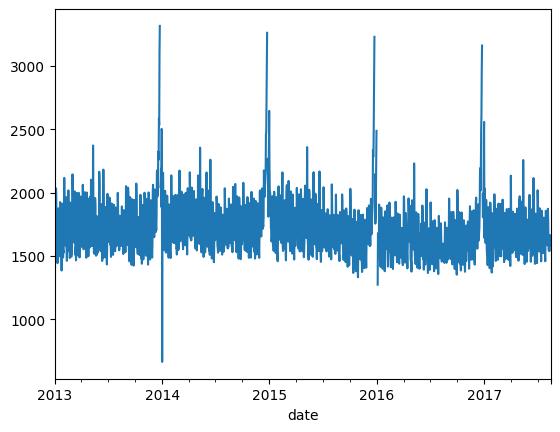

In [51]:
df["transactions"].resample("D").mean().plot()

<AxesSubplot:xlabel='date'>

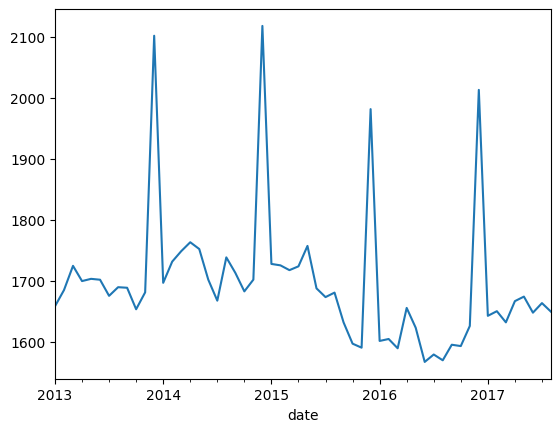

In [52]:
df["transactions"].resample("M").mean().plot()

<AxesSubplot:xlabel='date'>

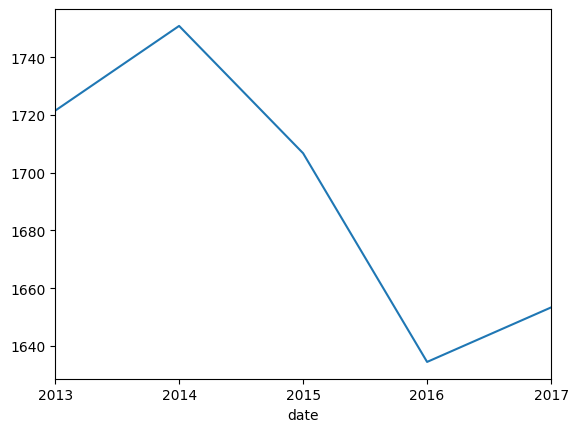

In [53]:
df["transactions"].resample("Y").mean().plot()

In [58]:
df["transactions"]

date
2013-01-01     770
2013-01-02    2111
2013-01-02    2358
2013-01-02    3487
2013-01-02    1922
              ... 
2017-08-15    2804
2017-08-15    1573
2017-08-15    2255
2017-08-15     932
2017-08-15     802
Name: transactions, Length: 83488, dtype: int64

<AxesSubplot:xlabel='date'>

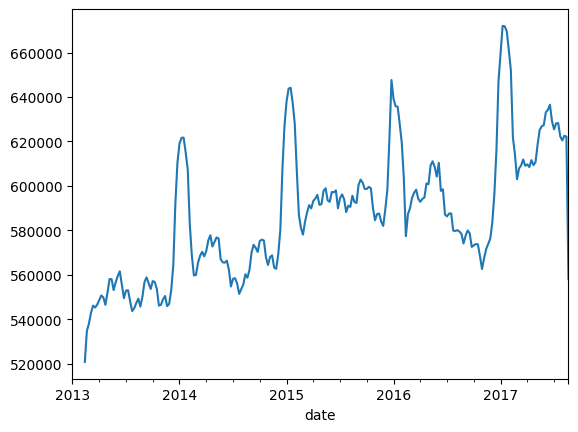

In [86]:
df["transactions"].resample("W").sum().rolling(7).mean().plot()